In [35]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("../data/thesis_full_clean.csv")
df

,rid,mturkID,paragraph_text_a,paragraph_text_z,paragraph_time_a,paragraph_time_z,word_a,word_z,cs1,cs2,...,memory11,memory12,memory13,memory_time,feedback,task_comprehension,condition_a,choice,value,bonus
0,R_22yVcIaFiVDcuTu,A2541C8MY0BYV3,NaN,There was one a dragon that shrunk because a w...,NaN,222.910,NaN,royalty,jacket,liquid,...,NaN,NaN,NaN,35.557,None,Crystal,False,royalty,25,100
1,R_3Dbir34GubIlMtR,A2QTL039A5VV3I,NaN,The dragon energy made his breath into a liqui...,NaN,185.688,NaN,powder,dragon,powder,...,NaN,NaN,NaN,31.239,NaN,Station,False,powder,23,92
2,R_eQCwvoot1SLuVDr,ARG392N6HWZCJ,I have quite a bit of in the anxiety when I th...,NaN,199.855,NaN,Kidney,NaN,javelin,Kidney,...,NaN,NaN,NaN,136.540,Remembeirng words,Crystal,True,kidney,23,92
3,R_2PhVsDbxE7SehXS,A5P12YJP805RG,NaN,I flew in on a dragon to the local casino desi...,NaN,216.238,NaN,pumpkin,pumpkin,pie,...,bakery,NaN,NaN,69.388,I just tried to remember whatever words I coul...,Crystal,False,pumpkin,13,52
4,R_umRbHZhSaCO6dY5,A2WYCY1FMQOD5F,Running in the woods during autumn I saw a fir...,NaN,193.123,NaN,autumn,NaN,school,silver,...,NaN,NaN,NaN,25.685,just thinking of the one closer to the letter A,Crystal,True,autumn,7,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,R_27jo4XvYLuE7GXP,A37JSOJH9695SM,NaN,I woke up in the morning on my day off and dec...,NaN,654.879,NaN,MAGNET,energy,liquid,...,NaN,NaN,NaN,53.838,none,Station,False,magnet,7,28
221,R_25ECE7aGcEdCrzg,AZTYIBLLB60V8,It was the first week in September and school ...,NaN,1075.701,NaN,Cabinet,NaN,Cabinet,Kidney,...,NaN,NaN,NaN,469.487,O thought of the letter closest to a in the th...,Station,True,cabinet,25,100
222,R_3LZjdb5uyZohCYG,A2EP2TI8HE8EGK,NaN,"Jane Bombs entered the casino, wearing her dra...",NaN,262.817,NaN,casino,pumpkin,jacket,...,NaN,NaN,NaN,35.015,I think weaving the words into a story helped ...,Crystal,False,casino,19,76
223,R_3FL59mDljC0cY2i,AZU9D7YLCTAYV,This beautiful autumn morning I woke up with a...,NaN,744.933,NaN,cabinet,NaN,baptism,cabinet,...,injury,school,NaN,139.959,My startegy was simply trying to remember the ...,Station,True,cabinet,25,100


array([[<AxesSubplot:title={'center':'rid'}>]], dtype=object)

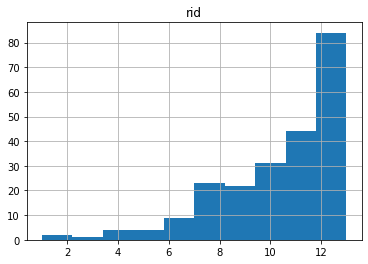

In [27]:
# Check memory performance
# TODO: re-run analysis with memory threshold of 50%

(df.melt(id_vars=["rid"], value_vars=["memory" + str(i+1) for i in range(13)], value_name="memory")
 .dropna()
 .groupby("rid")
 .agg({"rid": "count"})
 .hist()
)

In [54]:
# Check task comprehension performance
# TODO: re-run analysis with subjects that got this wrong excluded

"""
Do want XOR:
(A and notB) or (notA and B)
0,0 -> 0
0,1 -> 1
1,0 -> 1
1,1 -> 0
"""

passed_comprehension = np.array(df["task_comprehension"] == "Crystal") ^ df["condition_a"]
print(len(df)-sum(passed_comprehension))
# 30 subjects got the comprehension question wrong

df.loc[~passed_comprehension, ["paragraph_text_a", "paragraph_text_z", "feedback", "choice", "condition_a"]]

30


,paragraph_text_a,paragraph_text_z,feedback,choice,condition_a
1,NaN,The dragon energy made his breath into a liqui...,NaN,powder,False
2,I have quite a bit of in the anxiety when I th...,NaN,Remembeirng words,kidney,True
4,Running in the woods during autumn I saw a fir...,NaN,just thinking of the one closer to the letter A,autumn,True
11,NaN,"Last weekend, I went to the casino the night b...","No, nothing was difficult or confusing",powder,False
16,NaN,Smoke rolled out of the chimney from the cotta...,NaN,pumpkin,False
19,NaN,Getting ready for the holidays. First I put o...,Thank you,chimney,False
30,NaN,Drawing ire from surrounding nations like a ma...,Strategy was to write a fantasy story because ...,royalty,False
32,NaN,The dragon is a statue located in town. Town p...,NaN,pumpkin,False
35,NaN,Before going to church on Sunday I stopped at ...,I just tried to remember a work whose last let...,chimney,False
50,I had coffee at school near the cabinet and ha...,NaN,NaN,firefly,True


In [71]:
# Check outside word frequency in choice - think we had enforcement on this

(df.groupby("choice")
 .agg({"choice": "count"})
)

,choice
choice,
almond,1
anxiety,1
autumn,6
bakery,2
baptism,4
cabinet,65
canvas,10
casino,5
chimney,2


In [83]:
# Check outside word frequency

pd.set_option('display.max_rows', 500)
cs_words_count = (df.melt(id_vars=["rid"], value_vars=["cs" + str(i+1) for i in range(13)], value_name="consideration")
 .apply(lambda col: col.str.strip().str.lower())
 .groupby("consideration")
 .agg({"consideration": "count"})
)
cs_words_count

,consideration
consideration,
,1
almond,54
anixety,1
anxiety,57
anxiety.,1
august,1
autumn,58
baker,2
bakery,52


In [69]:
# Check if can look at order words presented and performance as a function of position of word they chose?
# Don't think I have this data

In [3]:
# Check time at different tasks distribution

In [15]:
# Check feedback column

#print("\n\n".join([str(i) + ", " + e for i, e in enumerate(df["feedback"]) if type(e) is str]))

In [ ]:
# Specific people deep dive

# 24 didn't get word order, see feedback

# 59 didn't get it either? ("I chose the one that has the most a's")

# 102 "The instructions didn't specify what "close" meant,
# so I just chose the word with the third letter closest to "a" in the alphabet."

In [86]:
#
df.loc[df["cs1"]=="anixety", ["memory"+str(i+1) for i in range(13)]]

,memory1,memory2,memory3,memory4,memory5,memory6,memory7,memory8,memory9,memory10,memory11,memory12,memory13
64,autumn,anxiety,coffee,javelin,wizard,kidney,cabinet,firefly,baptism,school,NaN,NaN,NaN
